In [1]:
!pip install -q fastai==2.2.5
!pip install -q fastbook

     |████████████████████████████████| 191 kB 12.7 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 776.8 MB 18 kB/s 
     |████████████████████████████████| 12.8 MB 39.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.1 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.1 which is incompatible.
     |████████████████████████████████| 720 kB 12.8 MB/s 
     |████████████████████████████████| 1.2 MB 48.0 MB/s 
     |████████████████████████████████| 188 kB 49.2 MB/s 


In [2]:
from fastai.vision.all import *
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


# 1. Data loading and augmentation

Create a DataBlock and DataLoaders using:
- Training and validation images collected in Lab2
- `Resize(640)` as item transform
- A size of 420 in the batch transforms
- Use a batch size of 32
- Use `set_seed()` to obtain reproducible results.
- Augmentations you find useful (see question 1)

Show a training and a validation batch.
Show augmentations, i.e. `show_batch()` with `unique=True`.

/content/gdrive/MyDrive/digits
Training batch


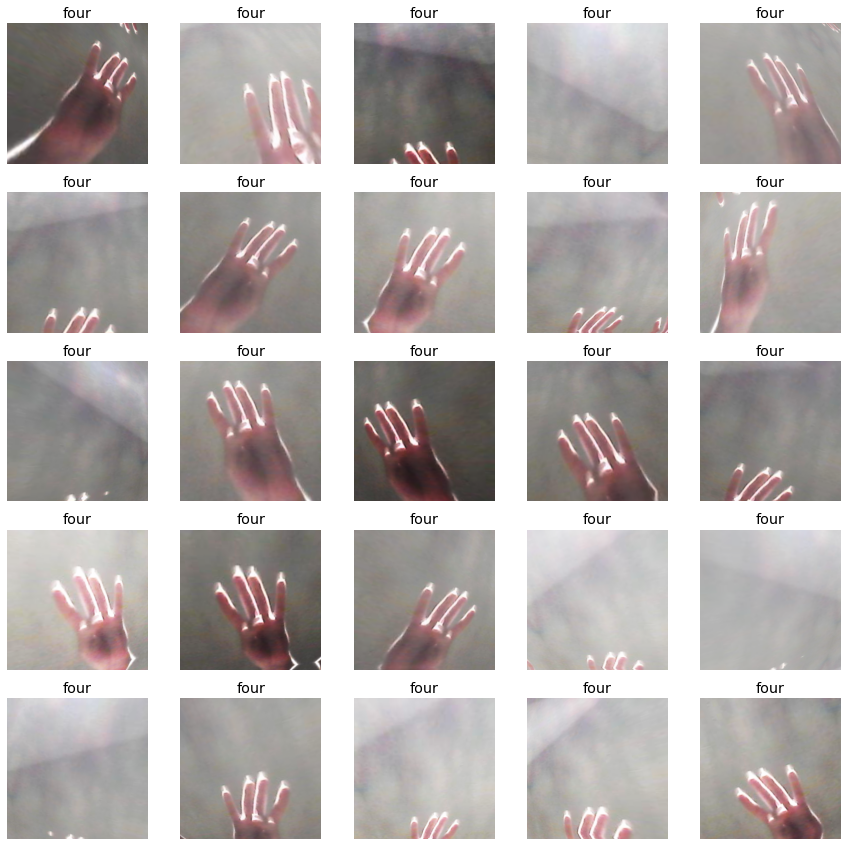

In [3]:
path = Path('./gdrive/MyDrive/digits/')
print(path.absolute())

set_seed(42, True)
fingers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #image->discrete category
    get_items=get_image_files, # path->images
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #how to train-valid split
    get_y=parent_label, # get the label from the directory name
    item_tfms=Resize(640),
    batch_tfms=aug_transforms(mult = 2.0, do_flip = True, max_rotate= 10.0,
                              min_zoom = 1.0, max_zoom=1.1, max_lighting=0.2, size=420)) #a set of transformations like  rotation, flipping, perspective warping, brightness changes and contrast changes) # resize to 128x128

print('Training batch')
dls = fingers.dataloaders(path, batch_size=32)
dls.train.show_batch(max_n=25, nrows=5, unique=True) 


Validation batch


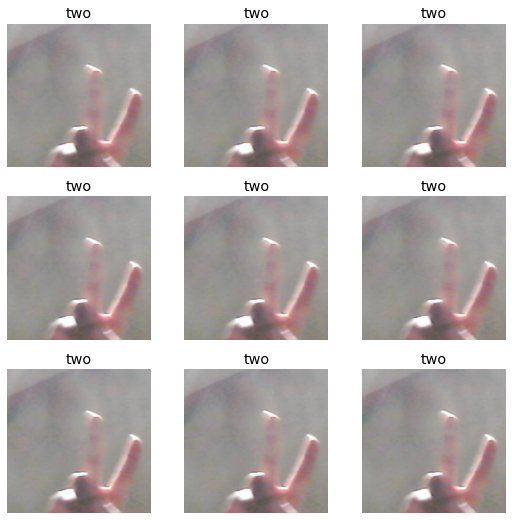

In [4]:
print('Validation batch')
dls.valid.show_batch(unique=True) 

### Question 1: How did you choose your augmentation transfroms? Include your thought process.
*I chose to augment the rotation, flipping across the x axis and max lighting, minimum and maximum zoom. The value I put for the rotation was 10.0. This augmentation was chosen to have the model more accurate for people holding their hands in angles. Because the model should be accurate regardless of the rotation, I chose a rotation that should take into account any angles that people hold their hands in. I chose to flip across the x axis to allow the data to better represent both hands. I chose a max lighting of 0.2 to incorporate changes in lighting to diversify our data. I chose to include a min and max zoom of 1,0 and 1.1 to incorporate images that are of different hand sizes.*

### Question 2: Are there any problems with your augmentations in the training data, or validation data, e.g. fingers missing, etc.?
*There are some problems with my training and validation data as seen in the shown batches. Due to the resizing and cropping in the code in lab2, the images are transformed to cut off some fingers. In the most extreme cases the images were resized and the hand was barely in the image. This could be fixed by having the images that were already taken be within a frame instead of resizing them. The other main issues that might arrise from the augmentations have to do with rotations that skew the images to make the fingers seem much shorter. This may influence the data as it doesn't represent the class well.*

# 2. Train the classifier

## 2.1 Train a fastai cnn multi-class classifier
- ResNet18 architecture.
- accuracy as metric.
- learning rate finder to find initial learning rate.
- transfer learning with unfreezing using descriminative learning rates.
- use a batch size of 32 and the DataBlock from above.
- Use the same `set_seed()` as above to obtain reproducible results.

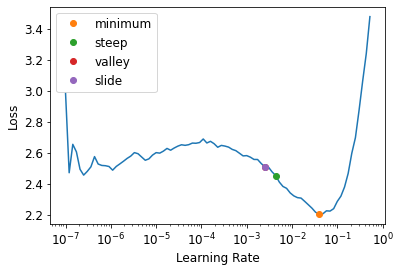

In [6]:
set_seed(42, True)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
lr_min, lr_steep, lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [7]:
print(f"Minimum/10:\t{lr_min:.2e}\nSteepest point:\t{lr_steep:.2e}\nLongest valley:\t{lr_valley:.2e}\nSlide interval:\t{lr_slide:.2e}")

Minimum/10:	3.98e-03
Steepest point:	4.37e-03
Longest valley:	2.51e-03
Slide interval:	2.51e-03


epoch,train_loss,valid_loss,accuracy,time
0,2.688669,2.321616,0.217391,00:21
1,2.429541,1.347688,0.456522,00:07
2,2.264558,1.274367,0.478261,00:07


SuggestedLRs(valley=0.0003981071640737355)

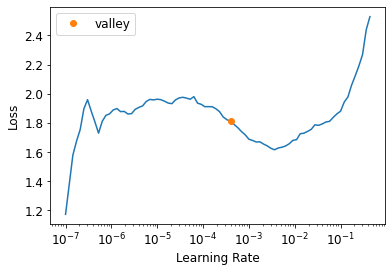

In [8]:
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.lr_find()

In [9]:
learn.fit_one_cycle(12, lr_max=slice(1e-5,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.034275,1.010865,0.652174,00:09
1,1.964759,0.998992,0.739130,00:08
2,1.837583,0.926190,0.739130,00:08
3,1.812388,1.933281,0.673913,00:08
4,1.794672,0.899164,0.804348,00:08
5,1.716580,0.878432,0.826087,00:09
6,1.615711,0.586655,0.826087,00:08
7,1.485592,0.312135,0.847826,00:09
8,1.339973,0.116981,0.934783,00:08
9,1.261192,0.122265,0.934783,00:09


### Question 3: How did you select the number of epochs and learning rates? 
*YOUR ANSWER HERE*


## 2.2 Experiment with different batch sizes
Using the pipeline, number of epochs, learning rates from above, re-run the pipeline with a batch size of 16, 64

### Question 4: Keeping number of epochs and learning rates the same, how are validation loss and accuracy effected by the increase and decrease of batch size? 
*YOUR ANSWER HERE*


# 3. Analyze model performance
Retrain the model with batch size of 32 from the previous section.

Plot the confusion matrix.

# 4. Save the best model to file
Save the model using `learn.export()` as `.pkl` file. Verify that the model can be reloaded and used to make predictions.

# 5. Summary and Conclusion

Summarize:
- Augmentations used
- Training strategy, including batch size, number of epochs and learning rates.
- Accuracy achieved, summary of confusion matrix

*YOUR ANSWER HERE*


Conclusion:
- Are you satisfied with model performance? Why, why not?

*YOUR ANSWER HERE*


# 6.Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

*YOUR ANSWER HERE*
